In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 10]

import skfuzzy as fuzz

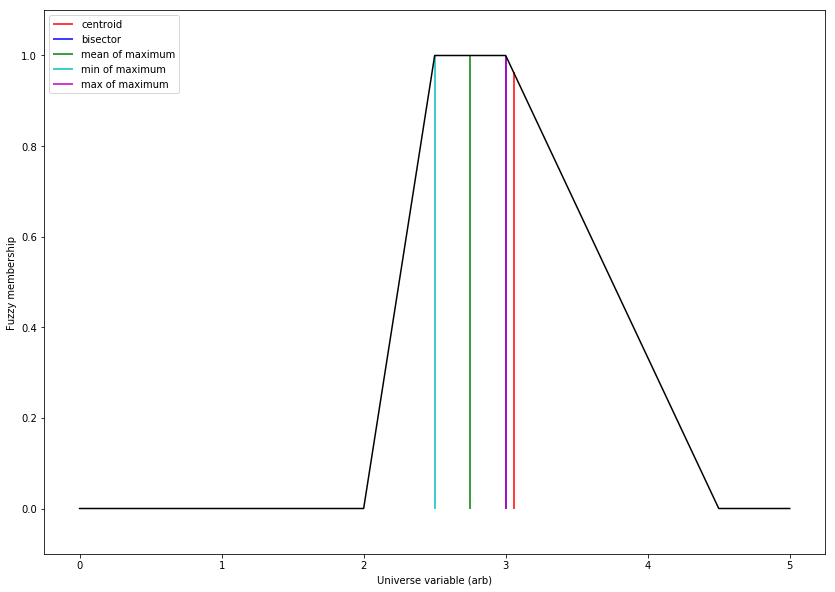

In [166]:
# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

In [5]:
data = pd.read_csv('Corruption Perceptions Index - Dataset.csv', sep=';')

data['african_union'] = data['african_union'].astype('bool')
data['arab_states'] = data['arab_states'].astype('bool')
data['BRICS'] = data['BRICS'].astype('bool')
data['EU'] = data['EU'].astype('bool')
data['G20'] = data['G20'].astype('bool')
data['OECD'] = data['OECD'].astype('bool')

data.head()

,country,ISO3,region,african_union,arab_states,BRICS,EU,G20,OECD,CPI_score_2017,...,bertelsmann_foundation_transformation_index,african_development_bank_CPIA,IMD_world_competitiveness_yearbook,bertelsmann_foundation_sustainable_governance_index,world_justice_project_rule_of_law_index,PRS_international_country_risk_guide,varieties_of_democracy_project,economist_intelligence_unit_country_ratings,freedom_house_nations_in_transit_ratings,PERC_asia_risk_guide
0,New Zealand,NZL,AP,False,False,False,False,False,True,89,...,0,0,93,97,82,93,77,90,0,0
1,Denmark,DNK,WE/EU,False,False,False,True,False,True,88,...,0,0,99,97,88,93,77,90,0,0
2,Finland,FIN,WE/EU,False,False,False,True,False,True,85,...,0,0,92,88,86,93,75,72,0,0
3,Norway,NOR,WE/EU,False,False,False,False,False,True,85,...,0,0,85,79,86,93,77,90,0,0
4,Switzerland,CHE,WE/EU,False,False,False,False,False,True,85,...,0,0,89,88,0,85,77,90,0,0


AP = Asian and the Pacific

WE/EU = Western Europe

AME = America

MENA = Middle East and North Africa

SSA = Sub-Saharan Africa

ECA = Eastern Europe & Central Asia

In [7]:
data.dtypes

country                                                 object
ISO3                                                    object
region                                                  object
african_union                                             bool
arab_states                                               bool
BRICS                                                     bool
EU                                                        bool
G20                                                       bool
OECD                                                      bool
CPI_score_2017                                           int64
standard_error_2017                                    float64
lower_CI_2017                                            int64
upper_CI_2017                                            int64
number_sources_2017                                      int64
CPI_score_2012                                           int64
standard_error_2012                                    

# Análisis exploratorio de los datos

Text(0.5,1,'Top 20 countries with highest CPI in 2017')

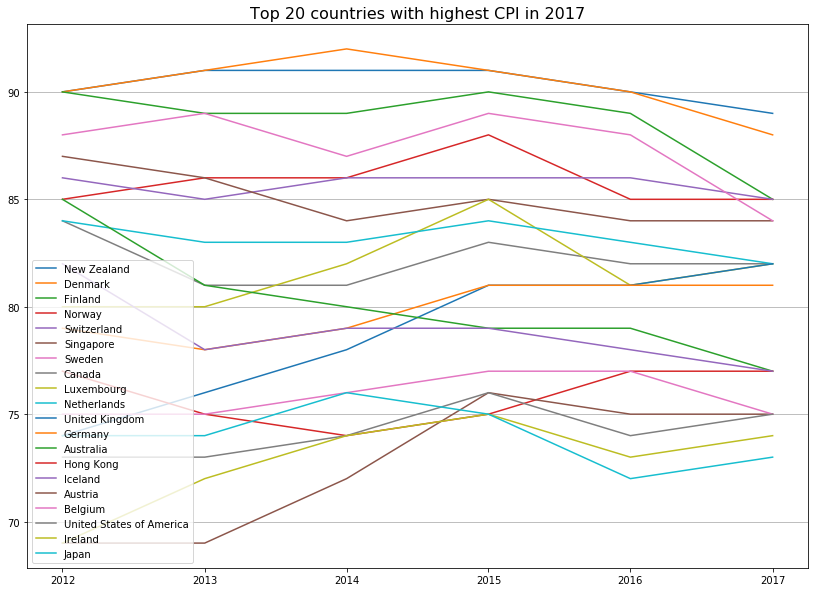

In [114]:
data_cpi = data[['country', 
                 'CPI_score_2017', 
                 'CPI_score_2016', 
                 'CPI_score_2015',
                 'CPI_score_2014',
                 'CPI_score_2013',
                 'CPI_score_2012']]

data_cpi.columns = ['country', '2017', '2016', '2015', '2014', '2013', '2012']

data_top_2017 = data_cpi.nlargest(20, columns=['2017'])

data_melt = pd.melt(data_top_2017, 
                    id_vars=['country'], 
                    var_name="date", 
                    value_name="CPI_score", 
                    value_vars=['2017', '2016', '2015', '2014', '2013', '2012'])
data_melt.date = pd.to_datetime(data_melt.date)
data_melt = data_melt.set_index(['country', 'date']).sort_index()

countries = data_top_2017.country.values

for c in countries:
    d = data_melt.loc[c]
    plt.plot(d.index, d.values)

plt.legend(countries, loc='best')
plt.grid(axis='y')
plt.title('Top 20 countries with highest CPI in 2017', fontsize=16)

Text(0.5,1,'Top 20 countries with lowest CPI in 2017')

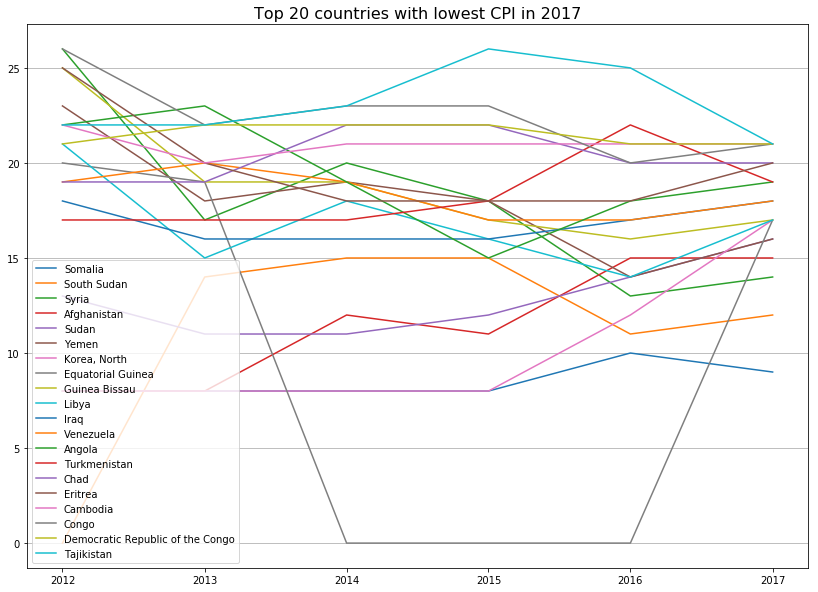

In [116]:
data_top_2017 = data_cpi.nsmallest(20, columns=['2017'])

data_melt = pd.melt(data_top_2017, 
                    id_vars=['country'], 
                    var_name="date", 
                    value_name="CPI_score", 
                    value_vars=['2017', '2016', '2015', '2014', '2013', '2012'])
data_melt.date = pd.to_datetime(data_melt.date)
data_melt = data_melt.set_index(['country', 'date']).sort_index()

countries = data_top_2017.country.values

for c in countries:
    d = data_melt.loc[c]
    plt.plot(d.index, d.values)

plt.legend(countries, loc='best')
plt.grid(axis='y')
plt.title('Top 20 countries with lowest CPI in 2017', fontsize=16)

Text(0.5,0.98,'Average of CPI by region and year')

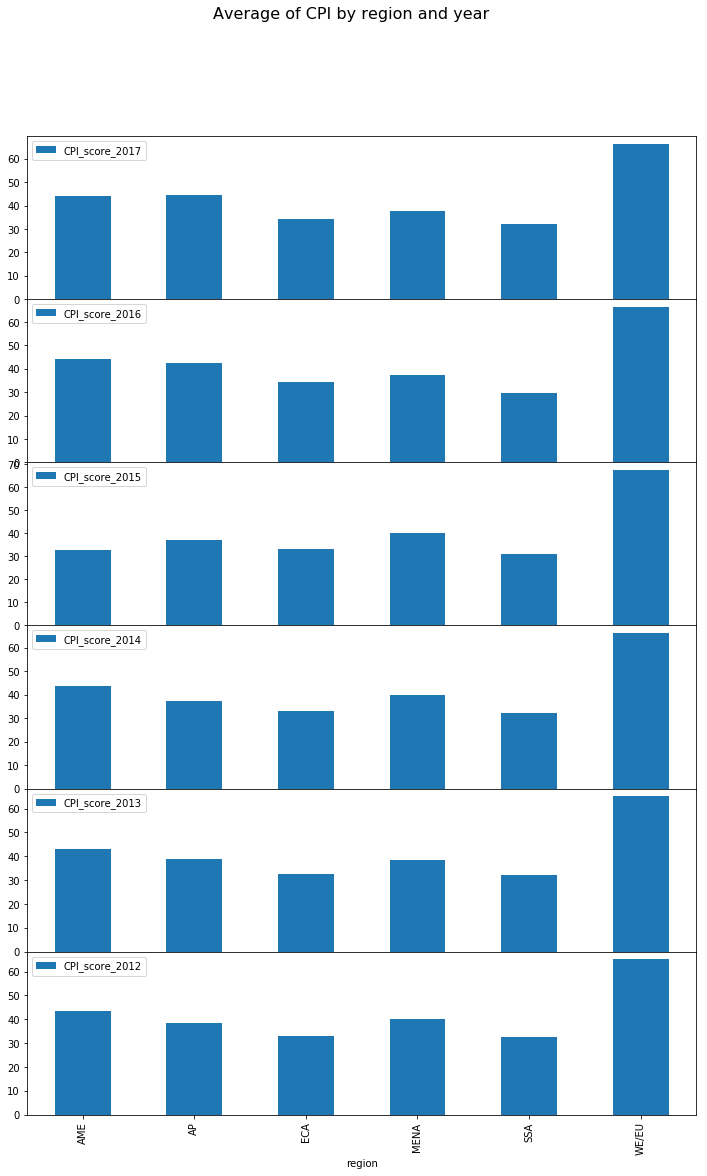

In [107]:
cpis = ['CPI_score_2017', 
        'CPI_score_2016', 
        'CPI_score_2015',
        'CPI_score_2014',
        'CPI_score_2013',
        'CPI_score_2012']

number_of_subplots = len(cpis)
fig, ax = plt.subplots(number_of_subplots, 1)
plt.subplots_adjust(hspace=0.000)

for i, cpi in enumerate(cpis):
    data_cpi = data[['region', cpi]]
    data_region_group = data_cpi.groupby('region').mean()
    
    data_region_group.plot(kind='bar', legend=True, 
                           figsize=(12, 18), ax=ax[i])
    
fig.suptitle('Average of CPI by region and year', fontsize=16)

# Fuzzyficación por país

In [176]:
aux1 = data.lower_CI_2017
aux2 = data.CPI_score_2017 - data.standard_error_2017
aux3 = data.CPI_score_2017 + data.standard_error_2017
aux4 = data.upper_CI_2017

country_fuzzification = []
for i in range(len(data)):
    x = np.arange(aux1[i], aux4[i], 0.1)
    country_fuzzification.append(fuzz.trapmf(x, [aux1[i], aux2[i], aux3[i], aux4[i]]))

In [180]:
country_fuzzification[-1]

array([ 0.        ,  0.05747126,  0.11494253,  0.17241379,  0.22988506,
        0.28735632,  0.34482759,  0.40229885,  0.45977011,  0.51724138,
        0.57471264,  0.63218391,  0.68965517,  0.74712644,  0.8045977 ,
        0.86206897,  0.91954023,  0.97701149,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.97701149,  0.91954023,
        0.86206897,  0.8045977 ,  0.74712644,  0.68965517,  0.63

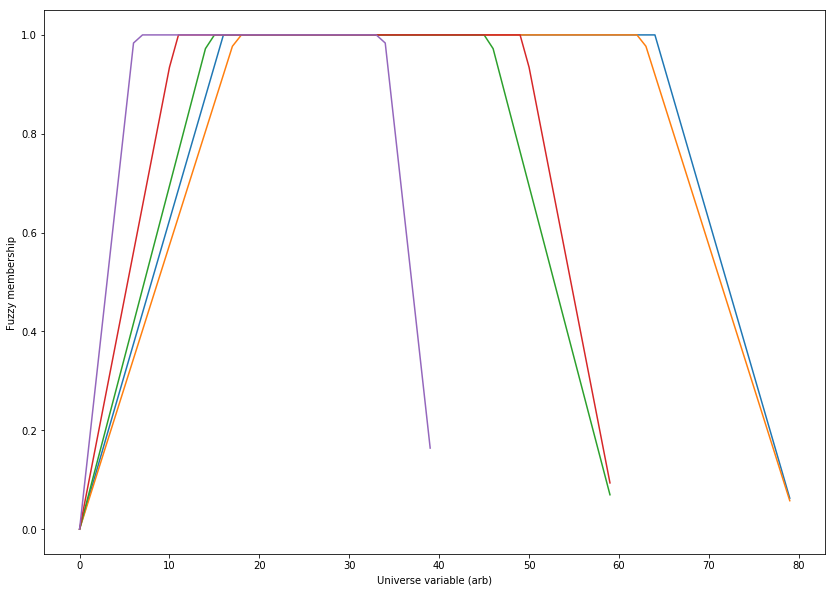

In [179]:
for i in range(5):
    min_ = country_fuzzification[-i].min()
    max_ = country_fuzzification[-i].max()
    x = np.arange(min_, max_, 0.1)
    plt.plot(country_fuzzification[-i])
    plt.ylabel('Fuzzy membership')
    plt.xlabel('Universe variable (arb)')

plt.show()